In [ ]:
# Import necessary libraries

# For the seam carving algorithm
import cv2 # type: ignore
import numpy as np
import matplotlib.pyplot as plt

#For the entropy energy map
from skimage.filters import rank
from skimage.morphology import disk

# For the HoG energy map
from skimage.feature import hog
from skimage.color   import rgb2gray

# To use the Numba JIT compiler
from numba import njit

# To use joblib for parallel processing
from joblib import Parallel, delayed

# Load the image
desert = cv2.imread('desert.jpg')
island = cv2.imread('kodim16.png')



from class_SeamCarver import SeamCarver

print("Original Image Shape:", island.shape)


Original Image Shape: (384, 512, 3)


[array([31, 32, 32, 33, 32, 33, 33, 32, 31, 30, 31, 30, 30, 30, 30, 29, 29,
       29, 29, 30, 31, 32, 33, 34, 33, 32, 32, 31, 30, 31, 32, 33, 32, 33,
       32, 32, 32, 32, 31, 30, 29, 28, 29, 29, 28, 29, 30, 31, 30, 30, 31,
       30, 31, 31, 32, 33, 34, 35, 36, 37, 37, 37, 38, 38, 39, 40, 41, 42,
       43, 43, 43, 43, 44, 43, 44, 43, 43, 44, 44, 44, 44, 45, 46, 47, 47,
       47, 48, 47, 48, 48, 47, 48, 47, 47, 48, 49, 50, 51, 52, 52, 53, 52,
       52, 51, 51, 50, 51, 52, 52, 51, 50, 50, 50, 51, 52, 52, 52, 52, 53,
       53, 53, 52, 51, 50, 49, 50, 49, 48, 47, 48, 47, 46, 46, 45, 44, 43,
       42, 42, 41, 41, 41, 42, 42, 43, 42, 43, 44, 45, 44, 45, 45, 46, 45,
       45, 44, 45, 45, 44, 45, 45, 44, 43, 42, 42, 42, 41, 41, 41, 42, 43,
       44, 44, 43, 43, 42, 42, 42, 43, 44, 45, 45, 46, 47, 46, 45, 45, 44,
       45, 45, 44, 43, 42, 43, 42, 43, 42, 42, 41, 40, 41, 41, 42, 42, 41,
       41, 42, 42, 43, 42, 43, 44, 43, 44, 45, 44, 43, 44, 45, 46, 46, 47,
       47, 48, 47, 47, 4

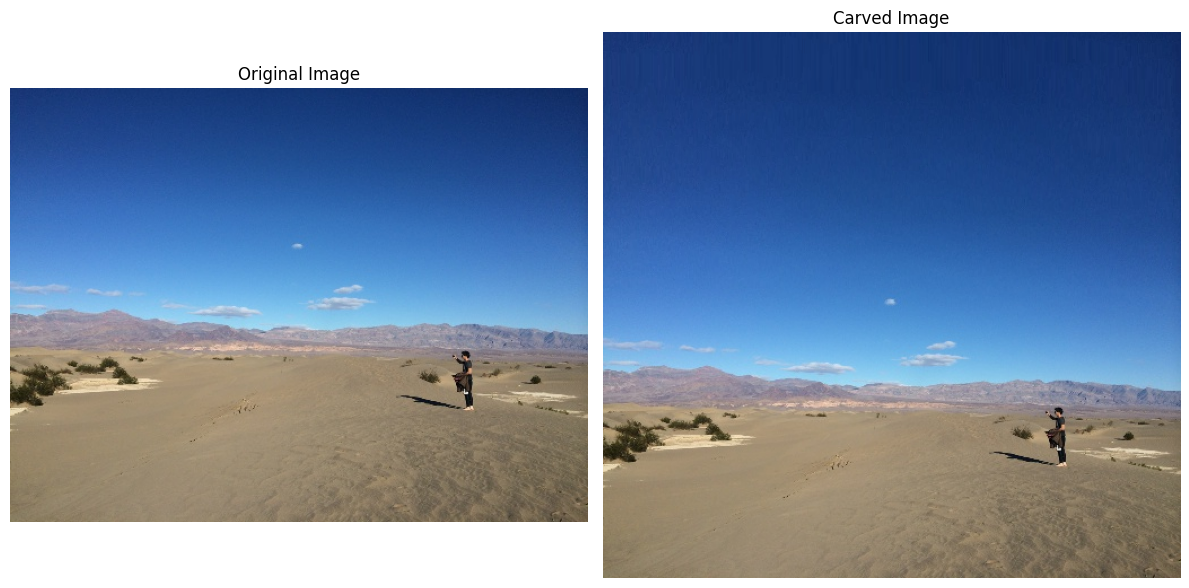

Original Image Shape: (384, 512, 3)
Carved Image Shape: (484, 512, 3)


In [2]:
# 1) Create a SeamCarver object
sc = SeamCarver(image_ref)

# 2) Define the number of seams to remove
num_seams = 100

# 3) Perform seam carving
history = sc.collect_seams(num_seams, method='l1',orientation='horizontal')
print (history)
carved_image = sc.upsize(image_ref, num_seams, method='l1',orientation='horizontal') 

# 4) Display the original and carved images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_ref, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(carved_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Carved Image')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Original Image Shape:", image_ref.shape)
print("Carved Image Shape:", carved_image.shape)